<a href="https://colab.research.google.com/github/garrettcl1/portfolio/blob/main/sequence_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

In this lab, you will use your Python skills to analyze the SARS-CoV-2 genome
in various ways.
 
We will be using the RefSeq genome sequence from NCBI
(https://www.ncbi.nlm.nih.gov/nuccore/NC_045512). For the lab, you will
use a few techniques (string manipulation, dictionaries, plotting) that are (as
you will see throughout the course) very useful in biological sequence analysis.

As with any coding questions, Google and Python documentation are your
friend! Like always, make sure to clone your Github repo to Datahub, document all your steps and answer all questions using Markdown sections in your
Jupyter notebook, and display all plots inline.

## Submission checklist

- Commit notebook on DataHub and push to GitHub
- Make sure `lab-2-username` repository contains changes on GitHub (GSIs can see your private repos)

# Read data

First, let's read the genome fasta file using Biopython, and store the genome as a
Python string. Similarly, let's read the transcriptome fasta file, and store the
transcriptome as a list of strings. Be sure that you are working with native
python strings and lists, not Biopython Seq objects. You are not allowed to use any BioPython function from now onwards.

In [ ]:
!conda install -y -q -c conda-forge biopython
from Bio import SeqIO
genome = str(next(SeqIO.parse("sequence.fa", "fasta")).seq)

transcriptome = []
for seq_rec in SeqIO.parse("transcriptome.fa", "fasta"):
    transcriptome.append(str(seq_rec.seq))






Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - biopython


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.79             |   py39hb9d737c_2         2.6 MB  conda-forge
    ca-certificates-2022.6.15.1|       ha878542_0         150 KB  conda-forge
    certifi-2022.6.15.1        |     pyhd8ed1ab_0         155 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  biopython          conda-forge/linux-64::biopython-1.79-py39hb9d737c_2

The following packages will be UPDATED:

  ca-certificates                      2021.10.8-ha878542_0 --> 2022.6.15.1-ha878542_0
  certifi            conda-forge/linux-64::certifi-2021.10~ --> conda-forge/noarch::certifi-2022.6.15.

# Conversion

The genome on the RefSeq database is the cDNA version of the genome,
but SARS-CoV-2 is an RNA virus! Convert the genome into an RNA
string. Print the first 100 bp.

In [ ]:
genome_rna = genome.replace("T","U")
print(genome_rna[:99])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACU


The SARS-CoV-2 genome is positive stranded. Convert the genome into
a negative strand sequence by computing the reverse complement. Print
the first 100 bp of the reverse complement sequence.

In [ ]:
old_chars = "ACGU"
replace_chars = "UGCA"
tab = genome_rna.maketrans(old_chars,replace_chars)
reverse_complement = genome_rna.translate(tab)[::-1]
print(reverse_complement[:99])

UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUGUCAUUCUCCUAAGAAGCUAUUAAAAUCACAUGGGGAUAGCACUACUAAAAUUAAUUUUACACAUU


# $k$-mer analysis

## Part 1

What does a $k$-mer represent?

### Answer

A k-mer is a substring of length k within a sequence.

## Part 2

Build two dictionaries of $k$-mer frequencies, one for $k=3$ (use `threemers` as variable name) and one for $k=4$ (respectively, `fourmers`). In each dictionary, the keys should be every possible k-mer of the given length and the corresponding values should be the number of times that k-mer occurs in the SARS-CoV-2 genome. To find the $k$-mers, scan along the sequence with a window size of $k$ and a stride of 1.

Note: Use the negative strand sequence to compute $k$-mer frequencies

Example for k=3:  
String: "ACTGACT"  
```
threemers = {"ACT": 2,   
             "CTG: 1,  
             "TGA": 1,  
             "GAC": 1,  
             ...}
```

In [ ]:
threemers = {}
start = 0
for i in range(3, len(reverse_complement)):
    three_letters = reverse_complement[start:i]
    if three_letters not in threemers:
        threemers[three_letters] = 0
    threemers[three_letters] += 1
    start += 1 
last_sequence = reverse_complement[len(reverse_complement)-3:]
threemers[last_sequence] += 1

start = 0
fourmers = {}
for i in range(4, len(reverse_complement)):
    four_letters = reverse_complement[start:i]
    if four_letters not in fourmers:
        fourmers[four_letters] = 0
    fourmers[four_letters] += 1
    start += 1 
    
last_sequence = reverse_complement[len(reverse_complement)-4:]
fourmers[last_sequence] += 1
fourmers

{'UUUU': 281,
 'UUUG': 213,
 'UUGU': 285,
 'UGUC': 158,
 'GUCA': 137,
 'UCAU': 187,
 'CAUU': 234,
 'AUUC': 122,
 'UUCU': 205,
 'UCUC': 80,
 'CUCC': 63,
 'UCCU': 90,
 'CCUA': 59,
 'CUAA': 129,
 'UAAG': 189,
 'AAGA': 213,
 'AGAA': 216,
 'GAAG': 131,
 'AAGC': 164,
 'AGCU': 145,
 'GCUA': 81,
 'CUAU': 91,
 'UAUU': 144,
 'AUUA': 218,
 'UUAA': 259,
 'UAAA': 289,
 'AAAA': 299,
 'AAAU': 232,
 'AAUC': 129,
 'AUCA': 208,
 'UCAC': 135,
 'CACA': 187,
 'ACAU': 210,
 'CAUG': 121,
 'AUGG': 84,
 'UGGG': 39,
 'GGGG': 14,
 'GGGA': 29,
 'GGAU': 51,
 'GAUA': 76,
 'AUAG': 170,
 'UAGC': 139,
 'AGCA': 255,
 'GCAC': 113,
 'CACU': 146,
 'ACUA': 138,
 'CUAC': 118,
 'UACU': 107,
 'AAUU': 274,
 'UAAU': 219,
 'AUUU': 245,
 'UUUA': 263,
 'UUAC': 126,
 'UACA': 200,
 'ACAC': 190,
 'UUAG': 174,
 'UAGG': 105,
 'AGGG': 50,
 'GGGC': 17,
 'GGCU': 48,
 'GCUC': 54,
 'CUCU': 132,
 'UCUU': 209,
 'CUUC': 152,
 'UUCC': 99,
 'UCCA': 143,
 'CCAU': 175,
 'CAUA': 200,
 'AUAU': 111,
 'UAUA': 138,
 'AGGC': 75,
 'GGCA': 94,
 'GCAG': 11

## Part 3

Plot a bar graph of the frequency of each 4-mer. Include only the 50 most
frequent 4-mers, and sort the bars in the plot by frequency (most frequent
→ least frequent).

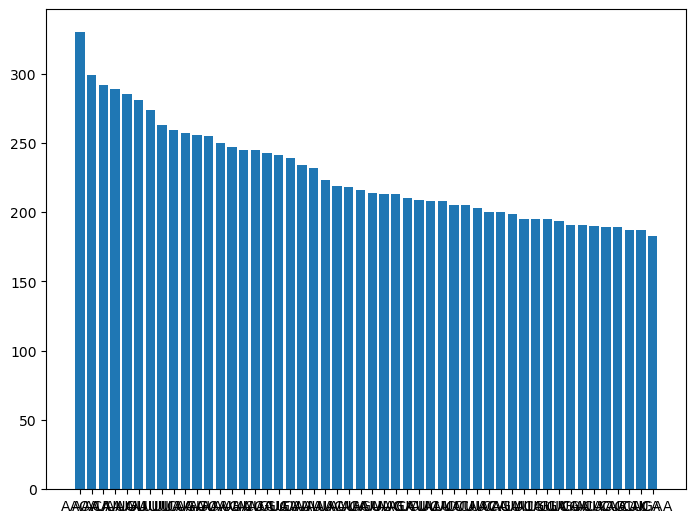

In [ ]:
# code here and plot inline
import matplotlib.pyplot as plt
from operator import itemgetter


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

top_50 = dict(sorted(fourmers.items(), key = itemgetter(1), reverse = True)[:50])
letters = list(top_50.keys())
counts = list(top_50.values())
ax.bar(letters,counts)
plt.show()

## Part 4

Plot the frequency of all 64 3-mers, similarly sorted by
frequency.

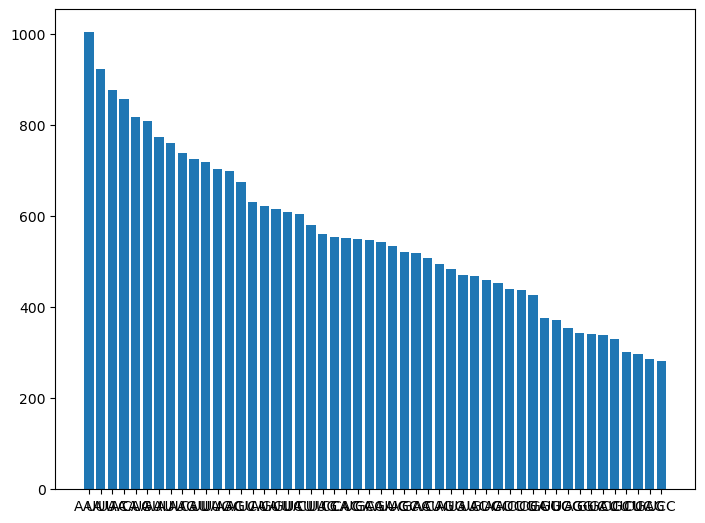

In [ ]:
# code here and plot inline

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

top_50 = dict(sorted(threemers.items(), key = itemgetter(1), reverse = True)[:50])
letters = list(top_50.keys())
counts = list(top_50.values())
ax.bar(letters,counts)
plt.show()